  <div style='width: calc(100% - 4rem); font-size: 1.75rem; font-weight: bold; background: darkred;padding: 2rem; border-radius: 1rem; color: white; text-align: center; margin-bottom: 2rem'> Lights, Camera, Data! A Storytelling Approach to Netflix Content! ✨🎥📈</div>

<div style='font-size:1rem; color:#003049'>Netflix has become the leading platform in entertainment, despite the rise of other streaming services, offering a vast and diverse catalog of movies and TV shows, including both third-party content and original productions. Surpassing 300 million subscribers worldwide, Netflix's success is driven by its content strategy, which differentiates it from alternative platforms. Understanding trends in content type and their evolution over time can provide valuable insights into viewer preferences, regional differences, and the strategies behind Netflix's success.<br><br>

This project aims to explore Netflix's content library and its trends over time, from its inception to 2020—just before the impact of COVID-19—using data visualization techniques. These visualizations will help us analyze genre popularity, release trends, top 10 rankings across various categories, and more. We will investigate questions such as:

* How has Netflix and its content library evolved over the years?
* What kind of content can we found on the platform?
* Who are the most prolific directors and creators?

By leveraging Python libraries like Pandas, Matplotlib, and Seaborn, we will transform raw data into engaging, highly customized visual narratives.
</div>

<div style="
    background-color: #FFF0A5; 
    border: 2px solid #F7E38B; 
    border-radius: 5px; 
    padding: 15px; 
    box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1); 
    display: inline-block;
    margin: 5px auto;
">
    If you like my work, please give me an Upvote and comment! 👍 🙏
</div>


In [1]:
# Import python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from pandas.api.types import CategoricalDtype
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        continue
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

def check_collision(patch1, patch2):
    """
    Check if two FancyBboxPatch instances collide.

    Parameters:
        patch1 (matplotlib.patches.FancyBboxPatch): First patch.
        patch2 (matplotlib.patches.FancyBboxPatch): Second patch.

    Returns:
        bool: True if the patches collide, False otherwise.
    """
    # Get the bounding boxes of the two patches
    bbox1 = patch1.get_extents()
    bbox2 = patch2.get_extents()

    # Check for overlap
    return not (
        bbox1.xmax < bbox2.xmin or  # Patch1 is to the left of Patch2
        bbox1.xmin > bbox2.xmax or  # Patch1 is to the right of Patch2
        bbox1.ymax < bbox2.ymin or  # Patch1 is below Patch2
        bbox1.ymin > bbox2.ymax     # Patch1 is above Patch2
    )

netflix_data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix_data['date_added'] = pd.to_datetime(netflix_data.date_added, format='mixed')
netflix_data.loc[[5541, 5794, 5813], 'duration'] = ['74 min', '84 min', '66 min']
netflix_data.loc[[5989, 6827, 7312, 7537], 'rating'] = ['TV-PG', 'TV-14', 'TV-G', 'PG-13']

# <div style='color: #8B0000; font-size:2rem'>➡︎ Introduction</div>

## <div style='color: #8B0000'> Netflix Through Time: From Small Company to Global Phenomenon</div>

<div style='font-size:1.1rem; color:#003049'>
<b style='font-weight: bold; color: darkred'>Netflix was created in 1997 </b> by Reed Hastings and Marc Randolph, born out of frustration with late fees at their local video store. Initially, <b style='font-weight: bold; color: darkred'>it was founded as a novel concept – a mail-order DVD rental service</b> where customers could subscribe and receive DVDs by mail, revolutionizing how people accessed movies.
<br><br>
Despite criticism from many people and its competitors, Netflix gained traction, leveraging the internet to build a user-friendly platform and a recommendation system based on customer ratings and viewing history, surpassing 1 million subscribers in 2003
</div>

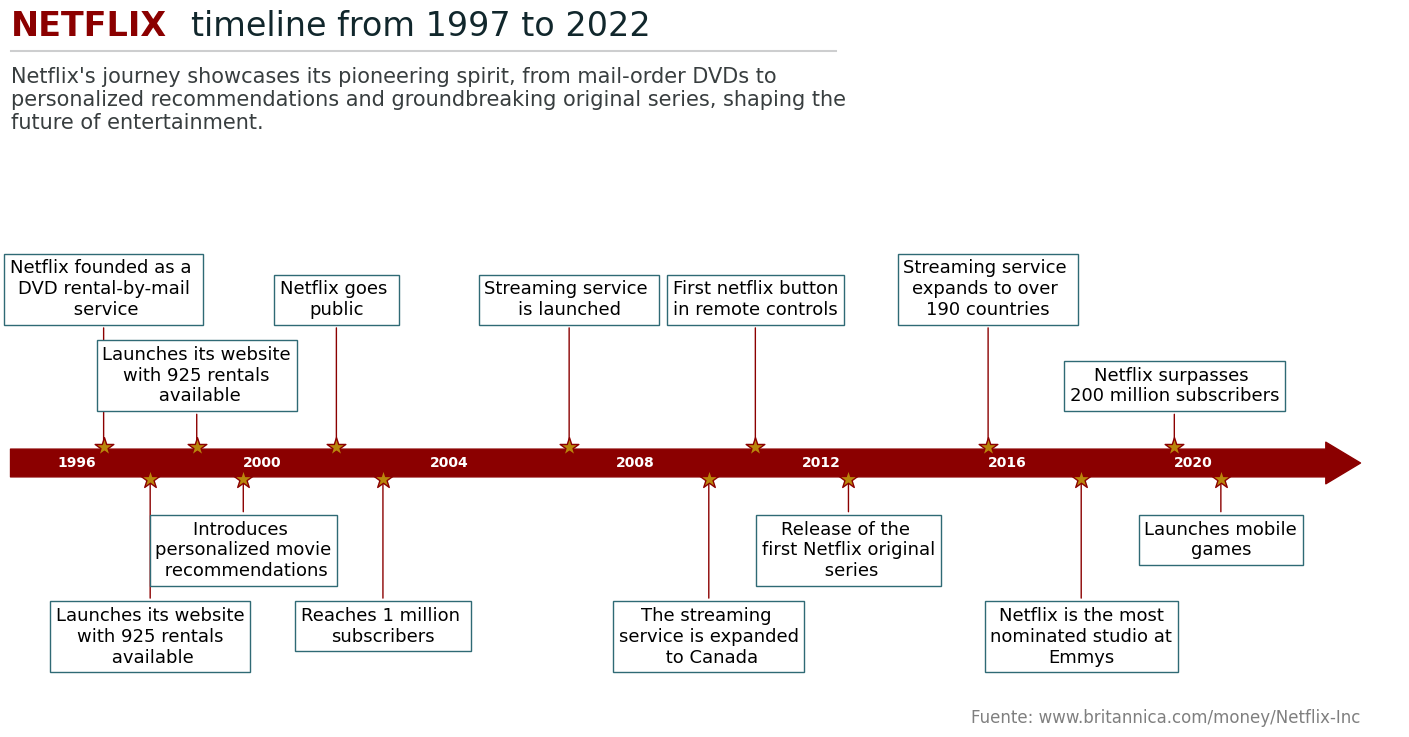

In [2]:
 fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(top=0.6, bottom=0.15, left=0.05, right=0.95)
fig.text(s='NETFLIX', x=0.05, y=0.9, ha='left', va='bottom', fontsize=24, fontweight='bold', color='darkred')
fig.text(s='timeline from 1997 to 2022', x=0.17, y=0.90, ha='left', va='bottom', fontsize=24, color='#11272C')
fig.add_artist(plt.Line2D([0.05, 0.6], [0.89, 0.89], color='#060D0F', alpha=0.2))
fig.text(
s="""Netflix's journey showcases its pioneering spirit, from mail-order DVDs to 
personalized recommendations and groundbreaking original series, shaping the
future of entertainment.""", x=.05, y=0.87, ha='left', va='top', fontsize=15, color='#060D0F', alpha=0.8
)

# Timeline data to plot
timeline = {
    1997: 'Netflix founded as a \nDVD rental-by-mail\n service',
    1998: 'Launches its website\nwith 925 rentals\n available',
    1999: 'Launches its website\nwith 925 rentals\n available',
    2000: 'Introduces \npersonalized movie\n recommendations',
    2002: 'Netflix goes \npublic',
    2003: 'Reaches 1 million \nsubscribers',
    2007: 'Streaming service \nis launched',
    2010: 'The streaming \nservice is expanded\n to Canada',
    2011: 'First netflix button\nin remote controls',
    2013: 'Release of the \nfirst Netflix original\n series',
    2016: 'Streaming service \nexpands to over \n190 countries',
    2018: 'Netflix is the most\nnominated studio at\nEmmys',
    2020: 'Netflix surpasses \n200 million subscribers',
    2021: 'Launches mobile\ngames'
}
    
years, facts = list(timeline.keys()), list(timeline.values())

# Add main arrow for timeline
ax.set(ylim=(-1, 1), xlim=(min(years)-2, max(years)+3))
arrow = ax.annotate(
    '', xy=(ax.get_xlim()[1], 0), xytext=(ax.get_xlim()[0], 0),
    arrowprops={'facecolor': 'darkred', 'edgecolor':'darkred', 'width': 20, 'headwidth': 30, 'headlength': 25, 'linewidth': 1, 'zorder':0}
)

# Add an annotation for each timeline item
annotations = []
for i in range(len(years)):
    year, fact = years[i], facts[i]
    yi = 0.8 if (i % 2 == 0) else - 0.8
    va = 'bottom' if (i % 2 == 0) else 'top'
    annot = ax.annotate(
        fact, 
        fontsize=13,
        xy=(year, 0),
        xytext=(year, yi),
        arrowprops={'arrowstyle': '-', 'color':'darkred'},
        ha='center', va=va,
        bbox={'facecolor':'white', 'edgecolor':'#2F6A75', 'alpha': 1}
    )
    annotations.append(annot)
    ax.scatter(
        [year], 
        [0.09 if va == 'bottom' else -0.09], 
        marker='*' if va == 'bottom' else '*',
        color='#B9860C',
        s=200,
        zorder=15,
        edgecolor='darkred'
    )

# Change xticklabels for custom label annotations on the timeline arrow
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
for label in ax.get_xticklabels():
    pos = label.get_position()
    if not (ax.get_xlim()[0] <= pos[0] <= ax.get_xlim()[1]):
        continue
    text = label.get_text()
    ax.text(
        s=text, x=pos[0], y=0,
        va='center', 
        fontsize=10, 
        fontweight='bold',
        color='white'
    )
ax.axis('off')

# Repositions the colliding annotations.
fig.canvas.draw()
for i in range(1, len(annotations)):
    for j in range(i):
        collision = check_collision(
            annotations[i].get_bbox_patch(),
            annotations[j].get_bbox_patch()
        )
        if collision:
            posi = annotations[i].get_position()
            annotations[i].set_y(posi[1]*0.4)
            fig.canvas.draw()

fig.text(s='Fuente: www.britannica.com/money/Netflix-Inc', x=0.95, y=0.05, ha='right', 
         fontsize=12, alpha=0.5);

<div style='font-size:1.1rem; color:#003049'>
Around 2007, Netflix began evolving, <b style='font-weight: bold; color: darkred'>transitioning from its DVD-by-mail service to a streaming platform</b> that provided instant access to hundreds of movies and TV shows directly on the internet. This shift proved pivotal, marking a turning point in how entertainment was consumed.
<br><br>
Netflix expanded its global reach significantly, <b style='font-weight: bold; color: darkred'>achieving availability in over 190 countries by January 2016 </b>, and experiencing substantial subscriber growth. The company strengthened its position by investing heavily in original content, producing critically acclaimed series such as 'House of Cards' and 'Stranger Things,' which contributed significantly to its subscriber base. Notably, <b style='font-weight: bold; color: darkred'>'Club de Cuervos,' released in 2015</b>, marked a pivotal moment as Netflix's first Spanish-language original series, paving the way for the platform's extensive expansion into international content production.
<br><br>
Netflix achieved a major milestone in 2019, reaching 200 million subscribers, and continued its growth trajectory, <b style='font-weight: bold; color: darkred'>surpassing 300 million subscribers in 2024</b>. Despite the emergence of strong competitors like Disney+, HBO Max, and Amazon Prime Video, Netflix remains a leading streaming platform.
</div>

# <div style='color: #8B0000; font-size:2rem'>➡︎  Evolution of Netflix content over time</div>

<div style='font-size:1.1rem; color:#003049'>
Netflix's transition from DVD rentals to streaming was a complex and slow. Initially, the company relied heavily on licensed content from major studios, <b style='font-weight: bold; color: darkred'>but many producers were skeptical about the viability of the emerging streaming model </b>. 
<br><br>
The turning point came around 2015, when <b style='font-weight: bold; color: darkred'>Netflix began investing aggressively in original programming</b>. The massive success of series like House of Cards, Orange Is the New Black, and Stranger Things solidified the company’s reputation as a content powerhouse, reducing its dependence on third-party licenses. <b style='font-weight: bold; color: darkred'>By 2019, Netflix was at its peak in content additions</b>, having expanded its original productions globally and securing a dominant position in the streaming market.
</div>

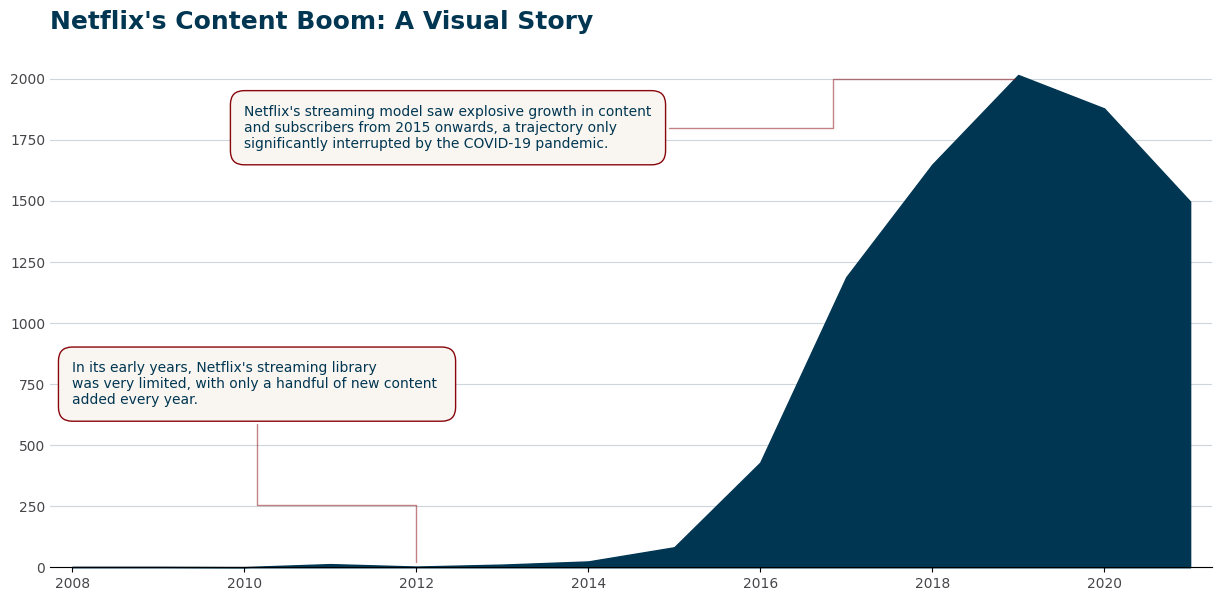

In [3]:
# Content over time plot
monthly_added = netflix_data.date_added.dropna().sort_values().dt.strftime('%Y-%m').value_counts(sort=False)
yearly_added = netflix_data.date_added.dropna().sort_values().dt.year.value_counts(sort=False)

fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(top=0.75)
ax.margins(0.02)
ax.fill_between(yearly_added.index, yearly_added, color='#003652', alpha=1)

ax.spines[['top', 'right',]].set_visible(False)
ax.spines['bottom'].set(position='zero')
ax.spines.left.set_visible(False)
ax.tick_params(axis='y', length=0)

ax.grid(axis='y', color='#003652', alpha=0.2, zorder=0)
ax.tick_params(labelcolor='#47454A')

ax.set_title('Netflix\'s Content Boom: A Visual Story\n', loc='left', fontsize=18, color='#003652', fontweight='bold')

bbox = {
    'edgecolor': '#89060C',
    'facecolor': '#F9F6F1',
    'boxstyle': 'round,pad=1',
}
arrow = {
    'arrowstyle': '-',
    'connectionstyle': 'bar,angle=180,fraction=0.5',
    'edgecolor': '#89060C',
    'alpha': 0.5
}

text1 = \
"""In its early years, Netflix's streaming library 
was very limited, with only a handful of new content 
added every year."""
ax.annotate(text1, xy=(2012, 10), xytext=(2008, 750), 
            color='#003652', bbox=bbox, va='center', arrowprops=arrow, 
            fontsize=10);

arrow = {
    'arrowstyle': '-',
    'connectionstyle': 'bar,angle=90,fraction=-0.5',
    'edgecolor': '#89060C',
    'alpha': 0.5,
    'relpos': (1, 0.5)
}

text1 = \
"""Netflix's streaming model saw explosive growth in content
and subscribers from 2015 onwards, a trajectory only 
significantly interrupted by the COVID-19 pandemic."""
ax.annotate(text1, xy=(2019, 2000), xytext=(2010, 1800), 
            color='#003652', bbox=bbox, va='center', arrowprops=arrow, 
            fontsize=10);



<div style='font-size:1.1rem; color:#003049'>
<br>
However, <b style='font-weight: bold; color: darkred'>the COVID-19 pandemic in 2020 introduced new challenges</b>. While lockdowns led to an explosion in streaming demand, production shutdowns and theater closures disrupted content pipelines. The industry landscape shifted further as competitors like Disney+, HBO Max, and Apple TV+ entered the streaming race, intensifying the battle for subscriber retention and exclusive content.
<br>

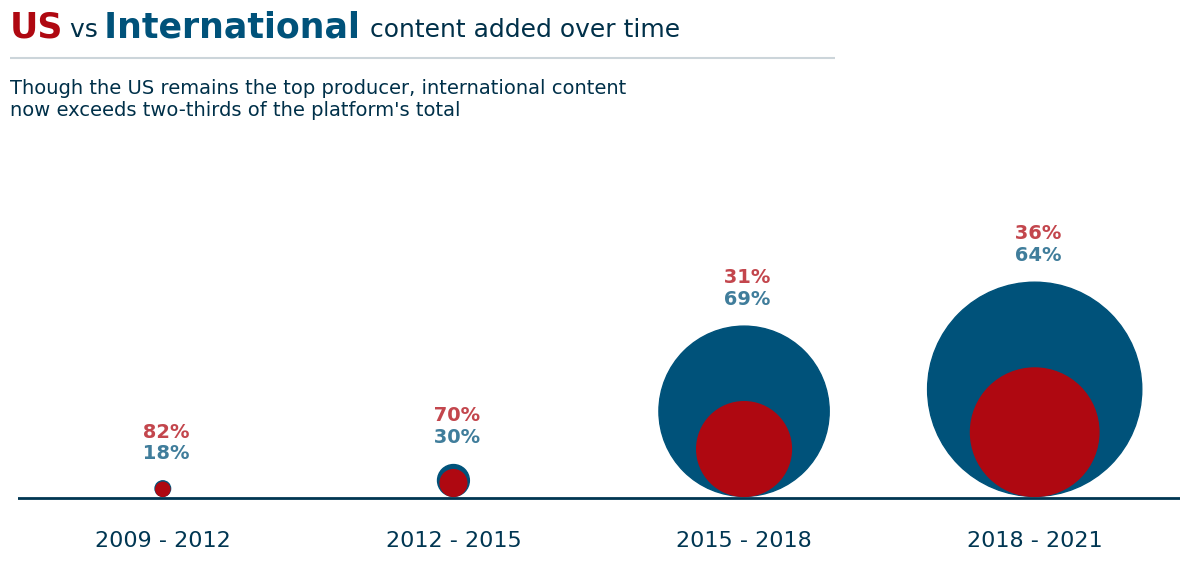

In [4]:
# Content grow: US vs International

total_us = netflix_data[netflix_data.country=='United States'].dropna().date_added.dt.year
total_int = netflix_data[netflix_data.country!='United States'].dropna().date_added.dt.year
total_us = pd.cut(total_us, bins=(2009, 2012, 2015, 2018, 2021)).value_counts()
total_int = pd.cut(total_int, bins=(2009, 2012, 2015, 2018, 2021)).value_counts()

fig, ax = plt.subplots(1, 4, figsize=(15, 7), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, top=0.75)
axt = fig.add_axes([.12, .73, 0.55, 0.2])
axt.axhline(0.7, color='#003049', alpha=0.2)
axt.text(s='Though the US remains the top producer, international content\n'
           'now exceeds two-thirds of the platform\'s total', 
        x=0, y=0.55, fontsize=14, color='#003049', ha='left', va='top')
axt.axis('off')

fig.text(x=0.12, y=0.9, s='US', fontsize=25, ha='left', fontweight='bold', color='#AF0811')
fig.text(x=0.155, y=0.9, s=' vs ',  fontsize=18, ha='left', fontweight='regular', color='#003049')
fig.text(x=0.175, y=0.9, s=' International', fontsize=25, ha='left', fontweight='bold', color='#00527A')
fig.text(x=0.355, y=0.9, s=' content added over time',  fontsize=18, ha='left', fontweight='regular', color='#003049')

for axi, area_us, area_int, interval in zip(ax[::-1], total_us, total_int, total_us.index):
    radius_tot = 0.13 * np.sqrt(area_us + area_int)
    radius_int = 0.13 * np.sqrt(area_us)
    pct_us = 100 * area_us / (area_us + area_int)
    pct_int = 100 * area_int / (area_us + area_int)
    
    circle = plt.Circle((0, radius_tot), radius_tot, color='#00527A')  
    circle_int = plt.Circle((0, radius_int), radius_int, color='#AF0811')

    axi.annotate(f' {pct_us:.0f}%', color='#AF0811', xy=(0, 2*radius_tot+3), 
                 fontweight='bold', ha='center', fontsize=14, alpha=0.75)
    axi.annotate(f' {pct_int:.0f}%', color='#00527A', xy=(0, 2*radius_tot+1.5),
                 fontweight='bold', ha='center', fontsize=14, alpha=0.75)
    
    axi.add_patch(circle)
    axi.add_patch(circle_int)
    axi.set_aspect('equal')
    axi.set(xlim=(-10, 10), ylim=(-2, 20)) # Ajuste del ylim para que los circulos se vean completos
    axi.set_xlabel(f'{interval.left} - {interval.right}', color='#003652', fontweight='regular', fontsize=16)
    axi.axhline(-0.1,  linewidth=2, color='#003652') # Agregar una linea horizontal en 0 para visualizacion
    axi.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    axi.set(xticks=[], yticks=[])

plt.show()



<div style='font-size:1.1rem; color:#003049'>
<br>
In its early stages, Netflix primarily featured US-produced content. A significant strategic shift occurred after 2015, leading to a substantial increase in international productions.  Although the US still contributes the most content, <b style='font-weight: bold; color: darkred'>international titles now account for 68% of the total: more than two-thirds of Netflix's offerings</b>.
<br>

# <div style='color: #8B0000; font-size:2rem'>➡︎  What's Streaming: A Look at Content Types</div>

Text(0.125, 0.94, 'Over two-thirds of Netflix productions are movies!')

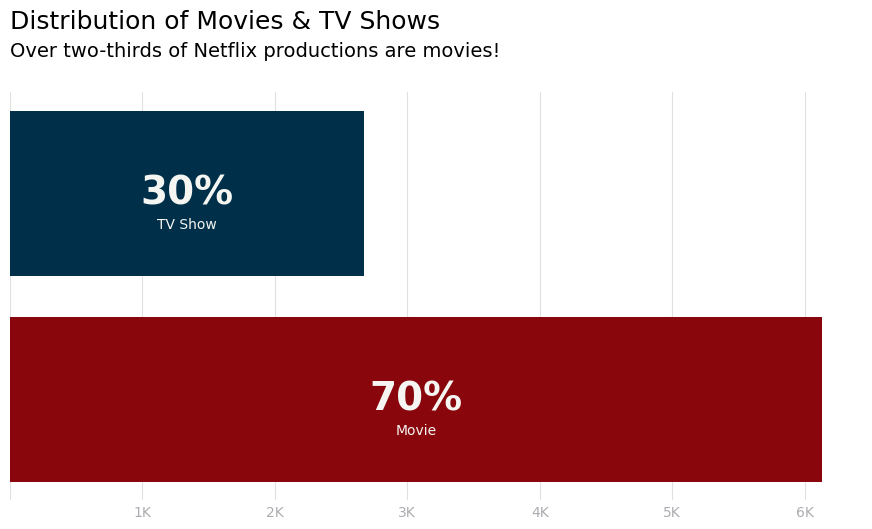

In [5]:
# Data transformations and fixing

bar_data = netflix_data['type'].value_counts()
plt.rcParams['font.family'] = 'sans-serif'
fig, ax = plt.subplots(figsize=(11, 6), gridspec_kw={'bottom': 0.2})
bars = ax.barh(bar_data.index, bar_data, color=['#89060C', '#003049'], zorder=5)
ax.spines[['bottom', 'right', 'top', 'left']].set_visible(False)
ax.spines['left'].set(lw=2, alpha=0.25)
ax.set_title('Distribution of Movies & TV Shows\n\n', loc='left', fontsize=18)

for bar, title in zip(bars, ax.get_yticklabels()):
    pct = f"{100 * bar_data[title.get_text()] / bar_data.sum():.0f}%"
    ax.annotate(
        pct,
        xy=(bar.get_width() / 2, title.get_text()),
        color='#f5f5f1',
        fontsize=28, fontweight='bold',
        ha='center', va='center',
        zorder=10
    )
    ax.annotate(
        title.get_text(),
        xy=(bar.get_width() / 2, bar.get_y()+0.25),
        ha='center', va='center',
        color='#f5f5f1',
        zorder=14
    )

ax.set_yticks([])
ax.tick_params(size=0, labelcolor='#ADABB0')
ax.grid(color='#E0DFE1', zorder=-5)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,s: f'{x/1000:.0f}K' if x else ''))
fig.text(0.125, 0.94, 'Over two-thirds of Netflix productions are movies!', ha='left', fontsize=14)

In [6]:

netflix_data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
idx = netflix_data[netflix_data.duration.isnull()].index
netflix_data['date_added'] = pd.to_datetime(netflix_data.date_added, format='mixed')
netflix_data.loc[idx, 'duration'] = netflix_data.loc[idx, 'rating']

rating_categories=[
    'TV-Y', 
    'TV-Y7',
    'G',
    'TV-G',
    'PG',
    'TV-PG',
    'PG-13',
    'TV-14',
    'R',
    'TV-MA',
    'NC-17'
]

netflix_data['rating'] = netflix_data.rating.astype(CategoricalDtype(rating_categories, ordered=True))
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


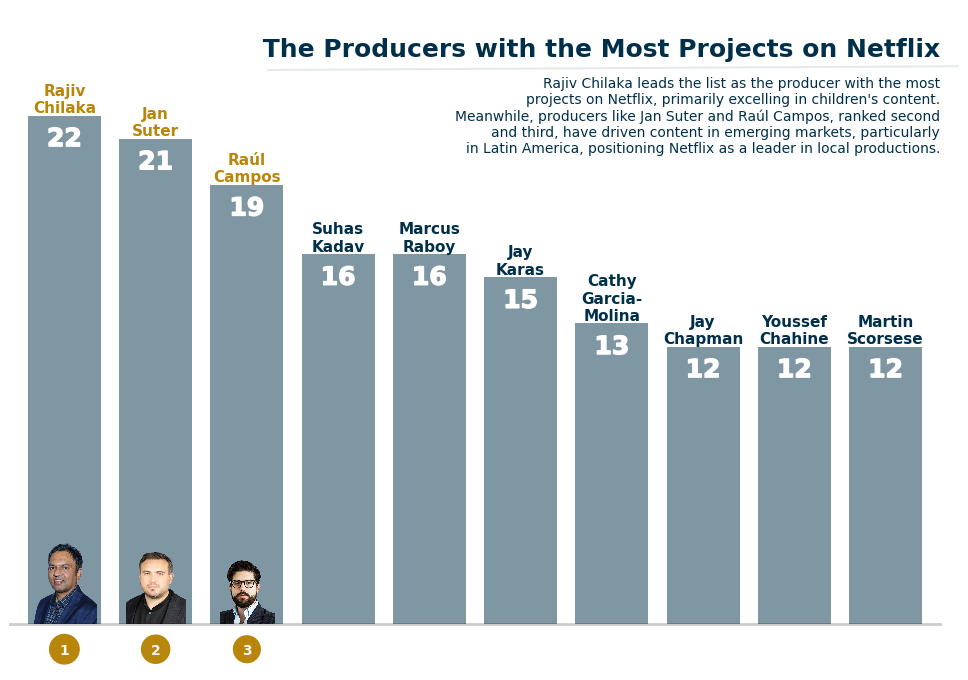

In [7]:
from matplotlib.offsetbox import OffsetImage, OffsetBox
from matplotlib.offsetbox import HPacker
from matplotlib import patheffects


directors = []
for director in netflix_data.director:
    if isinstance(director, str):
        directors.extend(director.split(','))
directors = [director.strip() for director in directors]

top_director = (
    pd.Series(directors)
    .value_counts()
    .head(10)
)
#top_director['...'] = 5
top_director.sort_values(ascending=False, inplace=True)
top_3 = top_director.index[:3]
 
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.margins(0.02)
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.spines['bottom'].set(position='zero', lw=2, zorder=10, alpha=0.2)
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])
bars = ax.bar(top_director.index, top_director, zorder=5, color='#003049', lw=0.5, alpha=0.5)

# Add images
img1 = OffsetImage(plt.imread('/kaggle/input/netflix-img/rajiv_chilaka.png'), zoom=0.13)
img1_bbox = AnnotationBbox(img1, (0, 0), frameon=False, box_alignment=(0.5, 0), zorder=10)
ax.add_artist(img1_bbox)
img2 = OffsetImage(plt.imread('/kaggle/input/netflix-img/Jan_suter.png'), zoom=0.12)
img2_bbox = AnnotationBbox(img2, (1, 0), frameon=False, box_alignment=(0.5, 0), zorder=10)
ax.add_artist(img2_bbox)
img3 = OffsetImage(plt.imread('/kaggle/input/netflix-img/raul_campos.png'), zoom=0.11)
img3_bbox = AnnotationBbox(img3, (2, 0), frameon=False, box_alignment=(0.5, 0), zorder=10)
ax.add_artist(img3_bbox)

# Add and format labels
for bar, label in zip(bars, top_director.index):
    text_label = label.replace(' ', '\n').replace('-', '-\n') if label != '...' else '•••'
    color = '#B9860C' if label in top_director.index[:3] else '#003049'
    ax.annotate(
        text_label,
        xy = (bar.get_x() + bar.get_width()/2, bar.get_height()),
        ha='center', va='bottom',
        color=color,
        fontsize=11 if label!='...' else 15,
        fontweight='600'
    )
    t=ax.annotate(
        bar.get_height() if label!='...' else '',
        xy= (bar.get_x() + bar.get_width()/2, bar.get_height()-0.5),
        ha='center', va='top',
        fontsize=18,
        color='#FFFFFF',
        fontweight='bold',
        alpha=1,
        path_effects=[patheffects.withStroke(linewidth=1, foreground='white')],
        zorder=50
    )


#bars[-1].remove()

# Add red circles
ax.scatter(
    ['Rajiv Chilaka', 'Jan Suter', 'Raúl Campos'],
    [-1.1, -1.1, -1.1], 
    marker='o',
    s=[450, 410, 370],
    color='#B9860C'
)

ax.set_ylim(-2, 23)
for i, label in enumerate(top_3):
    ax.annotate(i+1, xy=(label, -1.15), color='#F5F5F1', ha='center', va='center', 
                fontweight='bold')

ax.set_title('\n The Producers with the Most Projects on Netflix\n', loc='right', fontsize=18, color='#003049', fontweight='bold');
fig.text(
s="""Rajiv Chilaka leads the list as the producer with the most
projects on Netflix, primarily excelling in children's content.
Meanwhile, producers like Jan Suter and Raúl Campos, ranked second
and third, have driven content in emerging markets, particularly
in Latin America, positioning Netflix as a leader in local productions.""", x=0.9, y=0.8, ha='right', color='#003049')

line = plt.Line2D([0.34, 0.915], [0.91, 0.915], color='#003049', alpha=0.1)
fig.add_artist(line);

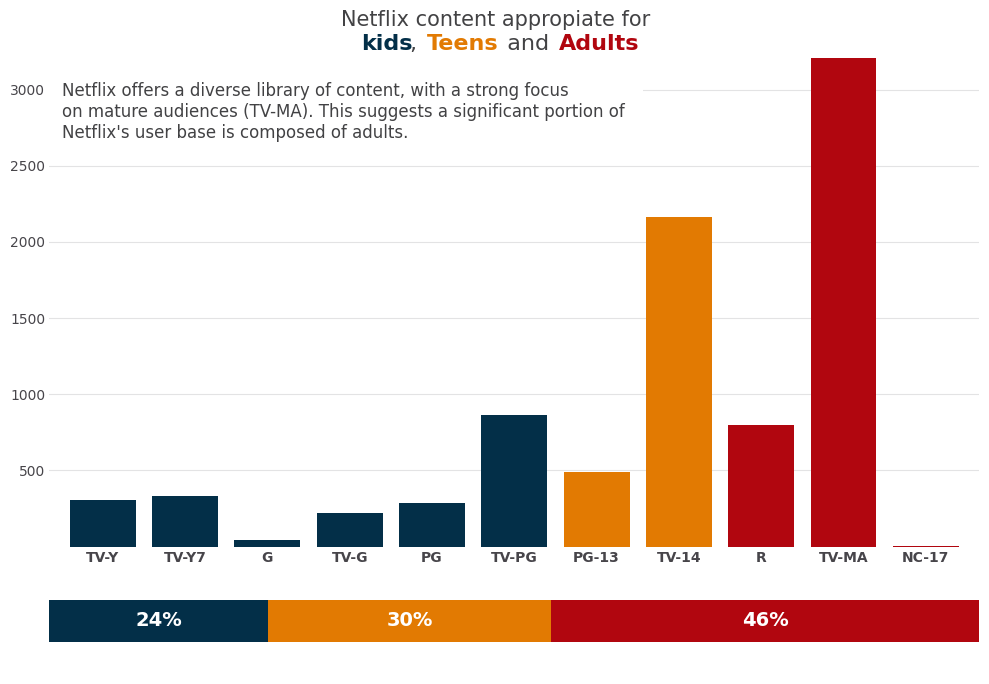

In [8]:
counts_new_class = netflix_data.rating.cat.rename_categories({
    'TV-Y': 'Kids1',
    'TV-Y7': 'Kids2',
    'G': 'Kids3',
    'TV-G': 'Kids4',
    'PG': 'Kids5',
    'TV-PG': 'Kids6',
    'PG-13': 'Teens7',
    'TV-14': 'Teens8',
    'R': 'Adults9',
    'TV-MA': 'Adults0',
    'NC-17': 'Adultsa',
}).str[:-1].value_counts()

fig, axs= plt.subplot_mosaic('A;A;A;A;B', figsize=(12, 8))
ax = axs['A']
ax.margins(0)

netflix_data.rating.value_counts().sort_index().plot(
    kind='bar',
    color='#7F97A3',
    width=0.8,
    ax=ax,
    zorder=6
)
ax.tick_params(
    axis='both',
    rotation=0, 
    direction='in',
    bottom=False,
    left=False,
    pad=3, 
    labelcolor='#47454A'
)
ax.set_xticklabels(ax.get_xticklabels(), weight='bold', zorder=15)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.set_xlabel('')
ax.grid(color='#47454A', alpha=0.15, axis='y', zorder=0)
ax.axis(ax.axis())

for i, bar in enumerate(ax.get_children()[:11]):
    if i < 6:
        bar.set_facecolor('#032F48')
    elif i < 8:
        bar.set_facecolor('#e27a02')
    else:
        bar.set_facecolor('#B1060F')

bar1, = axs['B'].barh([0], 
              [counts_new_class['Adults']],
              color='#B1060F',
              left=counts_new_class['Kids'] + counts_new_class['Teens'],
              height=0.6)
bar2, = axs['B'].barh([0], [counts_new_class['Teens']], 
              color='#e27a02', 
              left=counts_new_class['Kids'],
              height=0.6)
bar3, = axs['B'].barh([0], 
              [counts_new_class['Kids']], 
              color='#032F48',
              height=0.6)

axs['B'].set(ylim=(-0.75, 0.75), xlim=(0, counts_new_class.sum()))
axs['B'].axis('off')

for bar in [bar1, bar2, bar3]:
    xc = bar.get_x() + bar.get_width() / 2
    width = bar.get_width()
    pct = width / counts_new_class.sum()
    axs['B'].annotate(f'{100*pct:2.0f}%', xy=(xc, 0), ha='center', va='center', color='white', fontsize=14, fontweight='bold')

fig.text(s='Netflix content appropiate for ', x=0.5, y=0.92, fontsize=15, ha='center', color='#424244');
fig.text(s='kids', x=0.385, y=0.89, color='#032F48', fontweight='bold', fontsize=16)
fig.text(s=',', x=0.425, y=0.89, fontweight='regular', fontsize=16, color='#424244')
fig.text(s='Teens', x=0.44, y=0.89, color='#e27a02', fontweight='bold', fontsize=16)
fig.text(s='  and ', x=0.495, y=0.89, fontweight='regular', fontsize=16, color='#424244')
fig.text(s='Adults', x=0.55, y=0.89, color='#B1060F', fontweight='bold', fontsize=16)


s="""Netflix offers a diverse library of content, with a strong focus
on mature audiences (TV-MA). This suggests a significant portion of 
Netflix's user base is composed of adults."""

ax.text(-0.5, 3050, s, 
        bbox={'facecolor': 'white', 'edgecolor': 'none', 'alpha': 1, 'pad': 10}, 
        va='top', 
        fontsize=12,
        color='#424244');
